In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
festivales_bcn_13 = pd.read_pickle("./data/festivales_bcn_13_procesado.pkl")

In [37]:
categoricas_festivales = [
    "Ambit",
    "Titularidad",
    "NomDelFestival",
    "Mes",
    "Estacion",
    "Entrada"
]

In [38]:
categoricas_destacadas = [
    'Ambit', 
    'Titularidad', 
    'Mes', 
    'Estacion',
    "Entrada"
]

In [39]:
columnas_numericas_fests = [
    "Edicio",
    "Asistentes"
]

Funciones análisis

In [40]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    # Filtra solo las columnas que están en categoricas_destacadas
    columnas_categoricas = [col for col in columnas_categoricas if col in categoricas_destacadas]
    
    num_columnas = 2 
    num_filas = (len(columnas_categoricas) + num_columnas - 1) // num_columnas  # Calcula el número de filas necesario

    fig, axes = plt.subplots(num_filas, num_columnas, figsize=(15, 5 * num_filas))  # Ajusta el tamaño del subplot
    axes = axes.flatten()  # Aplanar el array de axes para un manejo más fácil

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if isinstance(df[col].iloc[0], list):  # Verificar si el elemento es una lista
            temp_df = df.explode(col)
        else:
            temp_df = df

        serie = temp_df[col].value_counts()
        if relativa:
            total = serie.sum()
            serie = serie.apply(lambda x: x / total)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            ax.set_ylabel('Frecuencia')

        # Usar la paleta 'viridis' y asignar 'x' a 'hue'
        sns.barplot(x=serie.index, y=serie, hue=serie.index, ax=ax, palette='viridis', legend=False)
        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')  # Ocultar ejes no utilizados

    plt.tight_layout()
    plt.show()

In [41]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [42]:
def plot_boxplot_grouped(df, column_to_plot, group_column):
    if df[column_to_plot].dtype in ['int64', 'float64'] and df[group_column].dtype in ['object', 'category']:
        sns.boxplot(data=df, x=group_column, y=column_to_plot)
        plt.show()

In [43]:
def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)

In [44]:
def variabilidad(df):
    df_var = df.describe().loc[["std", "mean"]].T
    df_var["CV"] = df_var["std"]/ df_var["mean"]
    return df_var

In [45]:
def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [46]:
def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

Tendencia central

In [47]:
festivales_bcn_13.describe().loc["mean"]

Edicio           13.232558
Asistentes    29692.181818
Name: mean, dtype: float64

In [48]:
festivales_bcn_13.describe().loc["50%"]

Edicio           11.0
Asistentes    11200.0
Name: 50%, dtype: float64

In [49]:
festivales_bcn_13.describe().loc["max"]

Edicio            45.0
Asistentes    171190.0
Name: max, dtype: float64

In [50]:
festivales_bcn_13.describe().loc["min"]

Edicio           1.0
Asistentes    2500.0
Name: min, dtype: float64

In [51]:
festivales_bcn_13[categoricas_destacadas].mode().T

,0
Ambit,Música
Titularidad,Privada
Mes,Junio
Estacion,Primavera


Comentarios <br>
La mediana, situada en 13, parece ser más representativa a la hora de ver la cantidad de ediciones que llevan a cuestas los festivales más representativos que han tenido lugar en los últimos 5 años en Barcelona, ya que hay valores bastante alejados de la media, como uno de ellos que lleva 54 ediciones a cuestas, lo que resulta en una media algo distorcionada. <br>
Lo mismo sucede con la cantidad de asistentes, ya que hay casos que van desde los 8mil hasta el casi medio millón, pero el valor más representativo está en torno a los 120 mil.

Frecuencias relativa y absoluta

In [52]:
for catego in categoricas_destacadas:
    print(festivales_bcn_13[catego].value_counts())
    print("\n")

Ambit
Música                         18
Audiovisuals                   13
Arts escèniques                 4
Arts visuals                    3
Lletres                         3
Multidisciplinaris i altres     3
Name: count, dtype: int64


Titularidad
Privada    36
Pública     7
Mixta       1
Name: count, dtype: int64


Mes
Junio         8
Julio         6
Mayo          6
Enero         5
Noviembre     5
Octubre       4
Septiembre    3
Abril         3
Febrero       2
Diciembre     1
Agosto        1
Name: count, dtype: int64


Estacion
Primavera    16
Verano       11
Otoño        10
Invierno      7
Name: count, dtype: int64




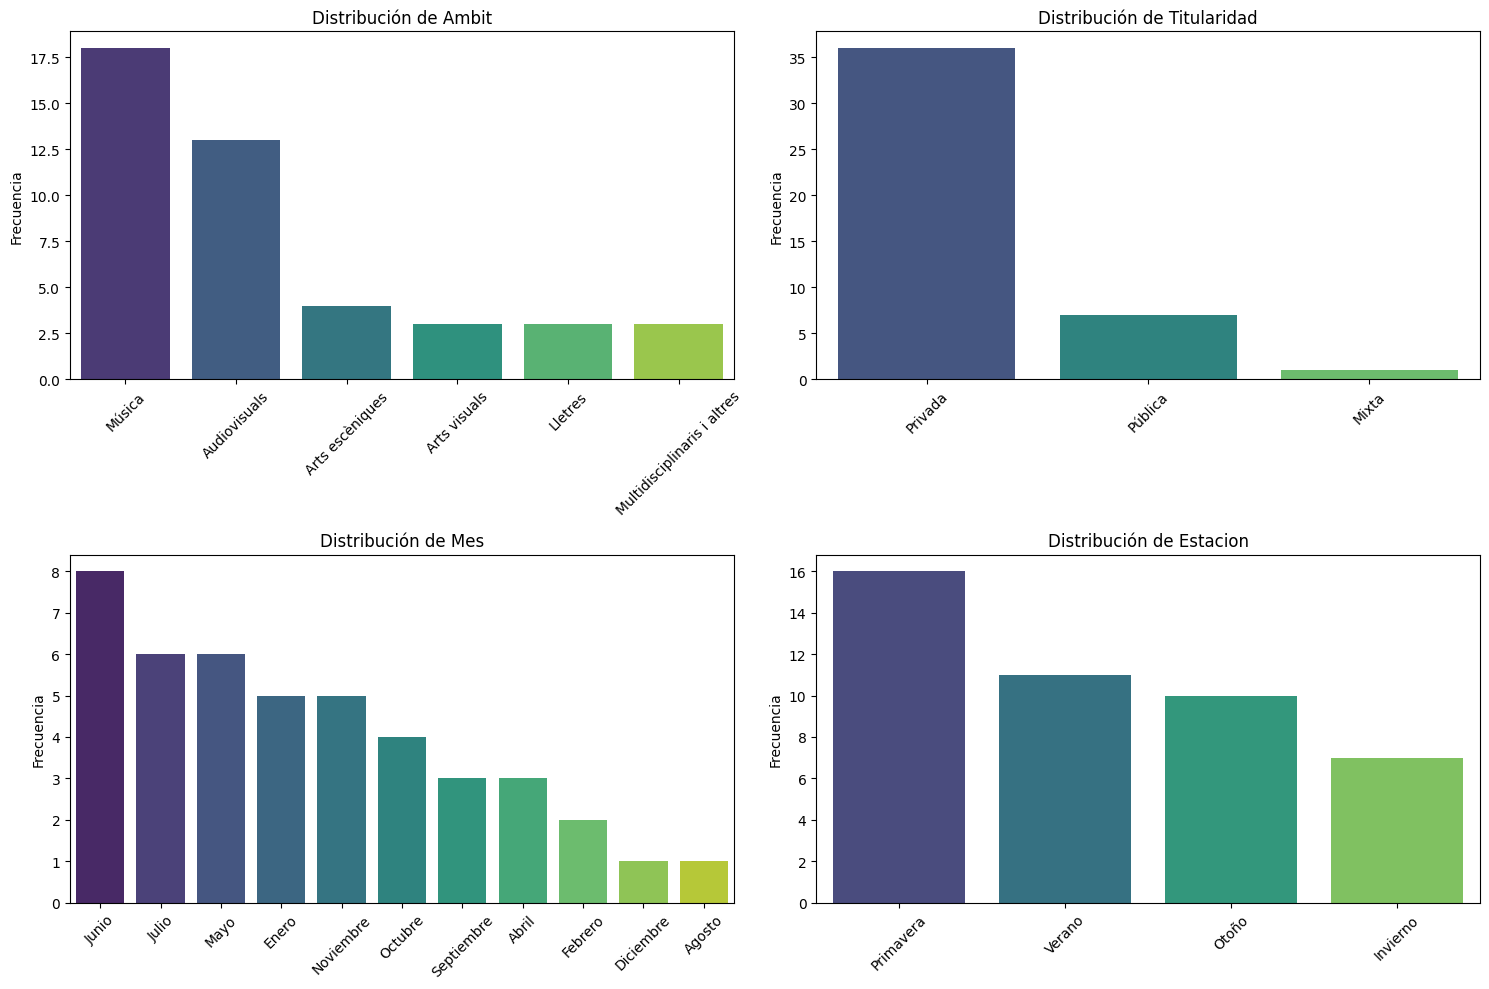

In [53]:
pinta_distribucion_categoricas(festivales_bcn_13, categoricas_destacadas)

Comentarios <br>
Junio parece ser el mes que concentra mayor cantidad de grandes festivales ya establecidos, si bien, a pesar de ello y si miramos según estaciones, es en otoño cuando mñas propuestas de este tipo hay. Cabe destacar, igualmente, que fuera de estos picos hay una distribucion equitativa enntre las otras temporadas. <br>
También es relevante observar que escénicas tiene menos representación en total, frente a las porpuestas musicales o multidisciplinares (que en ciertos casos incluyen tanto música como escénicas). <br>
Y que hay una predominancia de las poropuestas de titularidad pública, aunque seguidas muy de cerca de las privadas.

In [54]:
for catego in categoricas_destacadas:
    print(festivales_bcn_13[catego].value_counts()/len(festivales_bcn_13)*100)
    print("\n")

Ambit
Música                         40.909091
Audiovisuals                   29.545455
Arts escèniques                 9.090909
Arts visuals                    6.818182
Lletres                         6.818182
Multidisciplinaris i altres     6.818182
Name: count, dtype: float64


Titularidad
Privada    81.818182
Pública    15.909091
Mixta       2.272727
Name: count, dtype: float64


Mes
Junio         18.181818
Julio         13.636364
Mayo          13.636364
Enero         11.363636
Noviembre     11.363636
Octubre        9.090909
Septiembre     6.818182
Abril          6.818182
Febrero        4.545455
Diciembre      2.272727
Agosto         2.272727
Name: count, dtype: float64


Estacion
Primavera    36.363636
Verano       25.000000
Otoño        22.727273
Invierno     15.909091
Name: count, dtype: float64




Comentarios:<br>
Si en lugar de atender a las frecuencias absolutas miramos las relativas, las conclusiones son las mismas. No hace falta volver a graficar.

Medidas de posición

In [55]:
festivales_bcn_13.describe()

,Edicio,Asistentes
count,43.000000,44.000000
mean,13.232558,29692.181818
std,9.239762,43597.479681
min,1.000000,2500.000000
25%,7.000000,6428.500000
50%,11.000000,11200.000000
75%,18.000000,29682.750000
max,45.000000,171190.000000


In [56]:
get_IQR(festivales_bcn_13,"Edicio") 
# No es tanto mayor que la mediana (11), y casi igual que la media (mean)

11.0

In [57]:
print(festivales_bcn_13["Edicio"].quantile(0.5), "\n",
    festivales_bcn_13["Edicio"].quantile(0.9), "\n",
    festivales_bcn_13["Edicio"].quantile(0.95), "\n",
    festivales_bcn_13["Edicio"].max())

11.0 
 23.800000000000004 
 25.799999999999997 
 45.0


Comentarios: <br>
Es notable la dispersión de valores cuando miramos el rango intercuartílico en lo referente al número de ediciones, ya que la mediana está en las 13 ediciones, el 90% está por debajo de las 48, y el último 10% concentra picos de más de 50.

In [58]:
get_IQR(festivales_bcn_13,"Asistentes") 
# Sí es mucho mayor que la mediana(2120). Hay mucha dispersión. Hay que tomar con cuidado la tendencia central

23254.25

In [59]:
print(festivales_bcn_13["Asistentes"].quantile(0.5), "\n",
    festivales_bcn_13["Asistentes"].quantile(0.9), "\n",
    festivales_bcn_13["Asistentes"].quantile(0.95), "\n",
    festivales_bcn_13["Asistentes"].max())

11200.0 
 97878.50000000013 
 132989.1 
 171190.0


Comentarios: <br>
Mucho más agudo aún es el pico de número de asistentes, en el que la mediana está en 122.000, el primero 90% en 370mil, que ya es 3 veces más, pero el último segmento pega un salto abrupto superando los 450 mil.

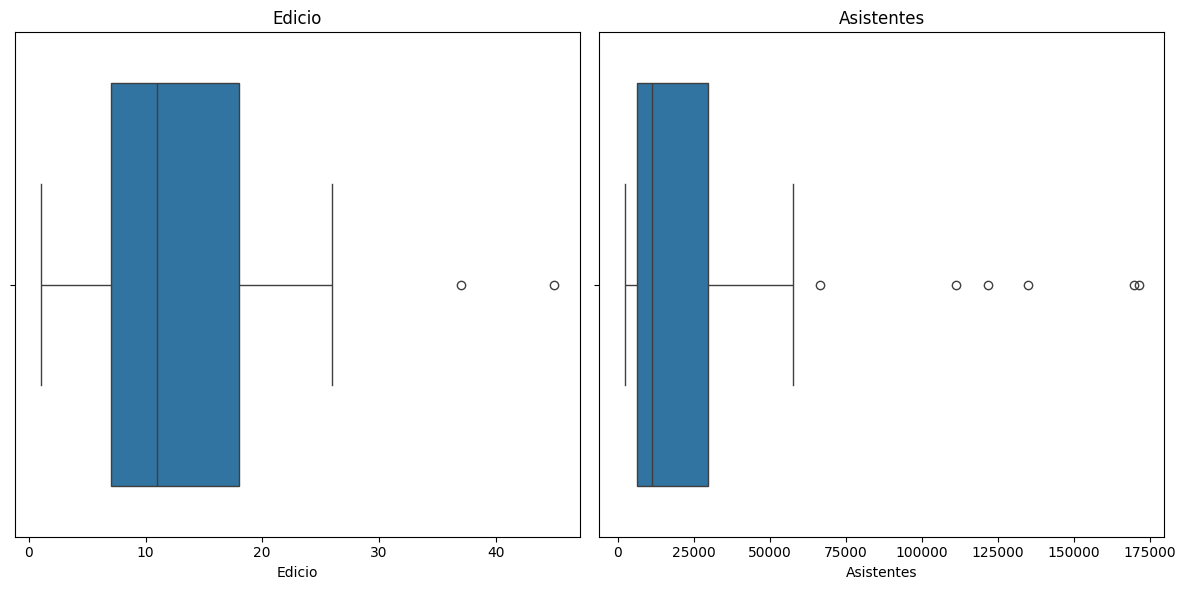

In [60]:
plot_multiple_boxplots(festivales_bcn_13, columnas_numericas_fests)

Comentarios: <br>
Gracias a los boxplots podemos observar como no hay una media centrada, ni en ediciones ni en asistentes, aunque la mayoría de los casos está dentro del rango. Y se ve claramente un outlier, que em el caso de los asistentes, que es el que tiene el casi medio millón de asistentes.

In [61]:
plot_boxplot_grouped(festivales_bcn_13, "Edicio", "Asistentes")

# Por qué no consigo que se imprima esto????

Medidas de dispersión

In [62]:
festivales_bcn_13.describe().loc[["std", "mean"]].T

,std,mean
Edicio,9.239762,13.232558
Asistentes,43597.479681,29692.181818


In [63]:
variabilidad(festivales_bcn_13)
# Menos 15% es baja variabilidad, entre 15 y 30 es normal, más de 30 es alta = Es decir, todos tienen una altísima variabilidad! A ver visualmente...

,std,mean,CV
Edicio,9.239762,13.232558,0.698260
Asistentes,43597.479681,29692.181818,1.468315


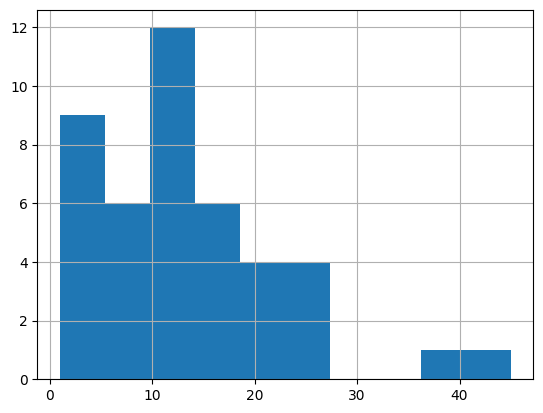

In [64]:
festivales_bcn_13["Edicio"].hist();

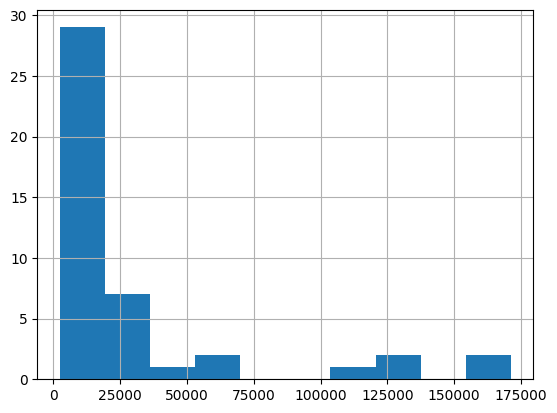

In [65]:
festivales_bcn_13["Asistentes"].hist();

Comentarios: <br>
Hay bastabte dispersión de valores, tanto de asistentes como de número de ediciones.

Distribución

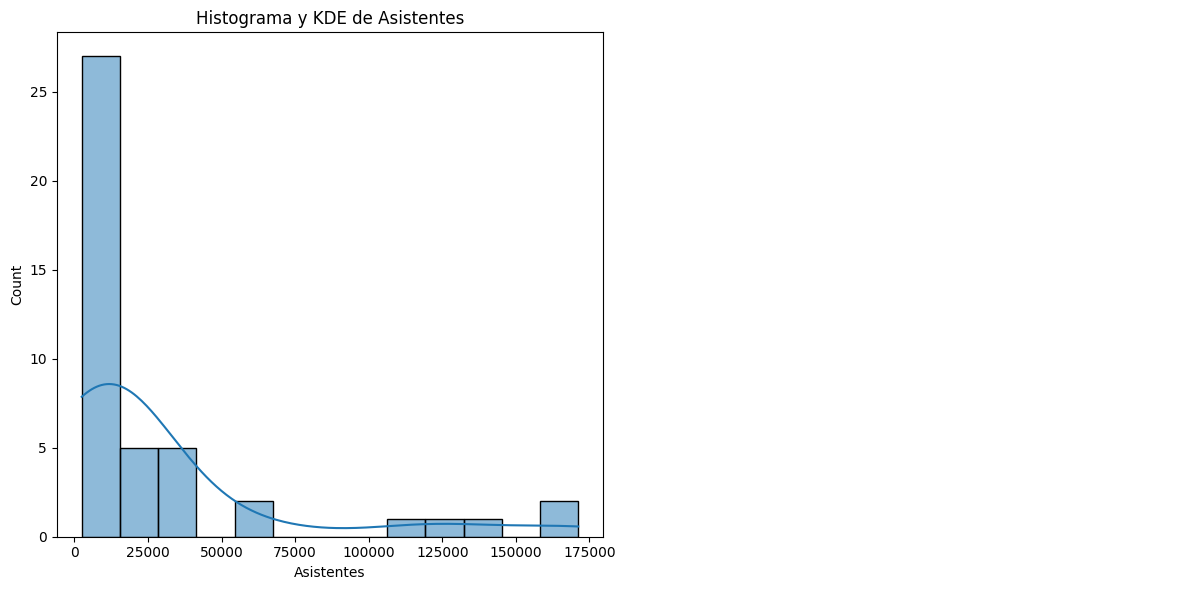

In [66]:
plot_histo_den(festivales_bcn_13, ["Asistentes"])

Anomalías outliers

(2,)


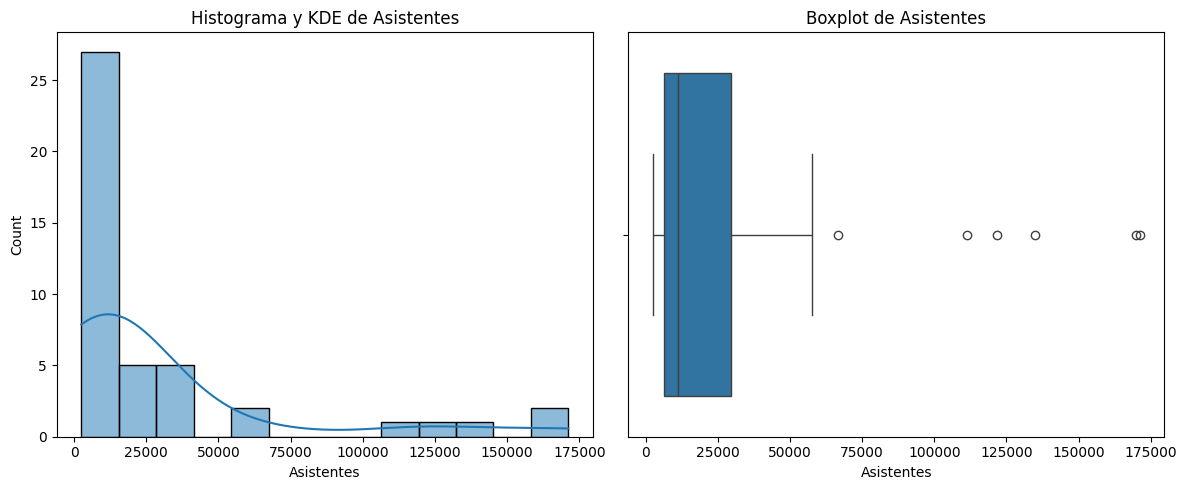

In [67]:
plot_combined_graphs(festivales_bcn_13, ["Asistentes"])

In [68]:
festivales_bcn_13

,Ambit,Edicio,NomDelFestival,Titularidad,Mes,Estacion,Asistentes,Entrada
1,Música,1.0,Bachcelona,Privada,Julio,Verano,5000.0,De Pago
2,Música,21.0,BAM. Barcelona Acció Musical,Pública,Septiembre,Verano,111290.0,Gratis
3,Arts visuals,8.0,Barcelona Design Week City Festival,Privada,Junio,Primavera,16300.0,De Pago
4,Lletres,16.0,Barcelona Poesia,Pública,Mayo,Primavera,6453.0,Gratis
5,Música,18.0,BarnaSants,Privada,Enero,Invierno,8515.0,De Pago
6,Lletres,8.0,BCNegra. Trobada de Novel·la Negra de Barcelona,Pública,Febrero,Invierno,6271.0,Gratis
7,Audiovisuals,2.0,Cinema Lliure a la Platja. Mostra de cinema in...,Privada,Julio,Verano,10000.0,De Pago
8,Audiovisuals,3.0,D'A Film Festival Barcelona,Privada,Abril,Primavera,10000.0,De Pago
9,Audiovisuals,16.0,DocsBarcelona,Privada,Mayo,Primavera,6355.0,De Pago
10,Arts visuals,10.0,Drap-Art. Festival Internacional de Reciclatge...,Privada,Diciembre,Otoño,7586.0,De Pago
